In [27]:
import numpy as np
from gensim.models import KeyedVectors
from scipy.spatial.distance import cosine
import nltk
from nltk.corpus import words
nltk.download('words')
nltk.download('stopwords')
from nltk.corpus import stopwords
from embeddings import Embeddings
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import os
import pickle
import bz2
import wikipedia2vec

# from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package words to
[nltk_data]     /Users/chitvangoyal/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chitvangoyal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
# Load pre-trained GloVe embeddings
def load_embeddings(file_path):
    return KeyedVectors.load_word2vec_format(file_path, binary=False)

# Compute cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

# Compute the differential association between two sets of words
def differential_association(word, A, B, embeddings):
    mean_cosine_A = np.mean([cosine_similarity(embeddings[word], embeddings[a]) for a in A])
    mean_cosine_B = np.mean([cosine_similarity(embeddings[word], embeddings[b]) for b in B])
    return mean_cosine_A - mean_cosine_B

# Compute effect size
def effect_size(X, A, B, embeddings):
    mean_X = np.mean([differential_association(x, A, B, embeddings) for x in X])
    std_dev = np.std([differential_association(x, A, B, embeddings) for x in X])
    return (mean_X) / std_dev


In [167]:
def read_words_from_file(file_path):
    """
    Read words from a text file and return them as a list.
    
    Parameters:
        file_path (str): Path to the text file.
        
    Returns:
        list: List of words read from the file.
    """
    with open(file_path, 'r') as file:
        words = [line.strip() for line in file]
    return words

# Example usage
file_path = "../adjectives_appearance.txt" 
appearance = read_words_from_file(file_path)
print(appearance)

file_path = "../adjectives_intelligencegeneral.txt"  
intelligencegeneral = read_words_from_file(file_path)
print(intelligencegeneral)

file_path = "../female_pairs.txt"  
female = read_words_from_file(file_path)
print(female)

file_path = "../male_pairs.txt" 
male = read_words_from_file(file_path)
print(male)


['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual', 'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly', 'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 'fat', 'weak', 'thin', 'pretty', 'beautiful', 'strong']
['precocious', 'resourceful', 'inquisitive', 'sagacious', 'inventive', 'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 'inquiring', 'judicious', 'analytical', 'luminous', 'venerable', 'imaginative', 'shrewd', 'thoughtful', 'sage', 'smart', 'ingenious', 'clever', 'brilliant', 'logical', 'intelligent', 'apt', 'genius', 'wise']
['she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl', 'herself', 'female', 'sister', 'daughters', 'mothers', 'women', 'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces', 'lady', 'wife', 'queen', 'princess', 'bride', 'girlfriend', 'mom', 'grandmother', 'duchess', 'maid', 'spinster', 'miss', 'madam', 'feminine']
['he', 'son', 'his', 'him', 'father', 'man', 'boy', 'hi

In [168]:
years = []
vocab = []
for file_name in os.listdir('../sgns/'):
        if file_name.endswith('.pkl'):
                #if file_name[:4] not in  ['1880', '2000','1860','1900']:
                file_path = os.path.join('../sgns/', file_name)
                words = np.load(file_path, allow_pickle=True)
                years.append(file_name[:4])
                vocab.append(words)
                        #print(words)

In [169]:
def list_update(words_list, vocab):
    word_list_updated=[]
    for i in words_list:
        t=False
        for j in vocab:
            if i not in j:
                t = True
        if t == False:
            word_list_updated.append(i)
    return word_list_updated



In [170]:

appearance = list_update(words_list= appearance, vocab= vocab)
print(appearance)


intelligencegeneral = list_update(words_list= intelligencegeneral, vocab= vocab)
print(intelligencegeneral)


female = list_update(words_list= female, vocab= vocab)
print(female)


male = list_update(words_list= male, vocab= vocab)
print(male)

['alluring', 'voluptuous', 'homely', 'plump', 'sensual', 'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly', 'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 'fat', 'weak', 'thin', 'pretty', 'beautiful', 'strong']
['precocious', 'resourceful', 'inquisitive', 'sagacious', 'inventive', 'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 'inquiring', 'judicious', 'analytical', 'luminous', 'venerable', 'imaginative', 'shrewd', 'thoughtful', 'sage', 'smart', 'ingenious', 'clever', 'brilliant', 'logical', 'intelligent', 'apt', 'genius', 'wise']
['she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl', 'herself', 'female', 'sister', 'aunt', 'niece', 'lady', 'wife', 'queen', 'princess', 'bride', 'girlfriend', 'mom', 'grandmother', 'duchess', 'maid', 'spinster', 'miss', 'madam', 'feminine']
['he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself', 'male', 'brother', 'uncle', 'nephew', 'gentleman', 'husband', 'grandfather', 'dad', 'gu

In [33]:
appearance_words=['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual',
                  'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly',
                  'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 'fat',
                  'weak', 'thin', 'pretty', 'beautiful', 'strong',
                  'height','cute','dull','blonde','chubby','pretty','demeanor']
appearance_words = list_update(words_list= appearance_words, vocab= vocab)
print(appearance_words)

['alluring', 'voluptuous', 'homely', 'plump', 'sensual', 'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly', 'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 'fat', 'weak', 'thin', 'pretty', 'beautiful', 'strong', 'height', 'cute', 'dull', 'blonde', 'chubby', 'pretty', 'demeanor']


In [34]:
intelligence_words = ['precocious', 'resourceful', 'inquisitive', 'sagacious', 'inventive', 
                      'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 'inquiring', 
                      'judicious', 'analytical', 'luminous', 'venerable', 'imaginative', 'shrewd', 
                      'thoughtful', 'sage', 'smart', 'ingenious', 'clever', 'brilliant', 'logical', 
                      'intelligent', 'apt', 'genius', 'wise', 'intellect', 'reasonable', 'wit', 'wisdom', 'shrewd']
intelligence_words = list_update(words_list= intelligence_words, vocab= vocab)
print(intelligence_words)

['precocious', 'resourceful', 'inquisitive', 'sagacious', 'inventive', 'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 'inquiring', 'judicious', 'analytical', 'luminous', 'venerable', 'imaginative', 'shrewd', 'thoughtful', 'sage', 'smart', 'ingenious', 'clever', 'brilliant', 'logical', 'intelligent', 'apt', 'genius', 'wise', 'intellect', 'reasonable', 'wit', 'wisdom', 'shrewd']


In [92]:
terror_words = ['terror', 'terrorism', 'violence', 'attack', 'military', 
                'war', 'radical', 'injuries', 'bomb', 'conflict', 'dangerous', 
                'kill', 'murder', 'strike', 'violence', 'fight', 'death', 'force', 'stronghold', 
                'wreckage', 'aggression', 'slaughter',  'casualties', 'massacre', 
                'retaliation', 'proliferation', 'militia', 'hostility', 'militant', 'terrorist', 
                'hostile']
terror_words = list_update(words_list= terror_words, vocab= vocab)
print(terror_words)

['terror', 'terrorism', 'violence', 'attack', 'military', 'war', 'radical', 'bomb', 'conflict', 'dangerous', 'kill', 'murder', 'strike', 'violence', 'fight', 'death', 'force', 'stronghold', 'wreckage', 'aggression', 'slaughter', 'massacre', 'retaliation', 'proliferation', 'militia', 'hostility', 'militant', 'terrorist', 'hostile']


In [131]:
toxic_appear = ['ugly',
'fat',
'skinny',
'gross',
'hideous',
'disgusting',
'repulsive',
'unattractive',
'deformed',
'misshapen',
'bony',
'flabby',
'lanky',
'stubby',
'obese',
'anorexic',
'emaciated',
'pudgy',
'bloated',
'wrinkled',
'haggard',
'dull',
'blemished',
'scarred',
'pockmarked',
'freckled',
'blotchy',
'spotty',
'pallid',
'sallow',
'dumpy',
'homely',
'plain',
'shabby',
'ragged',
'frazzled',
'mousy',
'frumpy',
'shapeless',
'sloppy',
'clumsy',
'awkward',
'gawkish',
'gangly',
'pigeon-toed',
'bowlegged',
'knock-kneed',
'flat-chested',
'buxom',
'saggy']

toxic_appear = list_update(words_list= toxic_appear, vocab= vocab)
print(toxic_appear)

['ugly', 'fat', 'skinny', 'gross', 'hideous', 'disgusting', 'repulsive', 'unattractive', 'deformed', 'misshapen', 'bony', 'flabby', 'lanky', 'stubby', 'obese', 'anorexic', 'emaciated', 'pudgy', 'bloated', 'wrinkled', 'haggard', 'dull', 'scarred', 'freckled', 'blotchy', 'spotty', 'pallid', 'sallow', 'dumpy', 'homely', 'plain', 'shabby', 'ragged', 'mousy', 'shapeless', 'sloppy', 'clumsy', 'awkward', 'gangly', 'bowlegged', 'buxom']


In [142]:
intelligence_toxic=['idiot', 'moron', 'dumb', 'retarded', 'imbecile', 'ignorant', 
'foolish', 'slow', 'simpleton', 'nitwit', 'dense', 'brainless', 'dullard', 'daft', 
'witless', 'unintelligent', 'silly', 'uneducated', 'uninformed', 'clueless', 'incompetent', 
'incapable', 'inept', 'ineptitude', 'neanderthal', 'neolithic', 'backward', 'unwise', 'senseless', 'foolhardy', 'loony']


intelligence_toxic = list_update(words_list= intelligence_toxic, vocab= vocab)
print(intelligence_toxic)

['idiot', 'moron', 'dumb', 'retarded', 'imbecile', 'ignorant', 'foolish', 'slow', 'simpleton', 'nitwit', 'dense', 'brainless', 'dullard', 'daft', 'witless', 'unintelligent', 'silly', 'uneducated', 'uninformed', 'clueless', 'incompetent', 'incapable', 'inept', 'ineptitude', 'neanderthal', 'neolithic', 'backward', 'unwise', 'senseless', 'foolhardy', 'loony']


In [144]:
other_toxic=['devious','bizarre','venomous','erratic','barbaric','frightening','deceitful',
             'forceful','deceptive','envious', 'greedy', 'hateful', 'contemptible', 'brutal', 
             'monstrous', 'calculating', 'cruel', 'intolerant', 'aggressive', 'monstrous']

other_toxic = list_update(words_list= other_toxic, vocab= vocab)
print(other_toxic)

['devious', 'bizarre', 'venomous', 'erratic', 'barbaric', 'frightening', 'deceitful', 'forceful', 'deceptive', 'envious', 'greedy', 'hateful', 'contemptible', 'brutal', 'monstrous', 'cruel', 'intolerant', 'aggressive', 'monstrous']


In [93]:
white = ['caucasian','european', 'uk', 'british', 'usa', 'britain', 'europe']
white = list_update(words_list= white, vocab= vocab)
print(white)

['caucasian', 'european', 'uk', 'british', 'usa', 'britain', 'europe']


In [94]:
non_white = ['black','asia','africa','hispanic','latino','indigenous', 'brown', 'east']
non_white = list_update(words_list= non_white, vocab= vocab)
print(non_white)

['black', 'asia', 'africa', 'hispanic', 'latino', 'indigenous', 'brown', 'east']


In [95]:
# import gensim.downloader as api

# #Using Google Word2Vec (The Original Word2Vec containing about 100 billion words.)
# embeddings = api.load('word2vec-google-news-300')

In [96]:
# weat = []
# effect_size_result =[]
# # file_path_words=[]
# # vec_path=[]
# #effect_size_result.append(effect_size(X=X, A=male, B=female, embeddings=keyed_vectors))
# effect_size(X=apprear_words, A=female, B=male, embeddings=embeddings)

In [ ]:
toxic_words=[]

In [79]:
years = sorted(years)
years

['1810',
 '1820',
 '1830',
 '1840',
 '1850',
 '1860',
 '1870',
 '1880',
 '1890',
 '1900',
 '1910',
 '1920',
 '1930',
 '1940',
 '1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '2000']

In [80]:

file_path_words=[]
vec_path=[]
for year in years:
    for file_name in os.listdir('../sgns/'):
        if file_name.endswith('.pkl') and file_name.startswith(year):
            file_path = os.path.join('../sgns/', file_name)
            file_path_words.append(file_path)
        if file_name.endswith('.npy') and file_name.startswith(year):
            file_path = os.path.join('../sgns/', file_name)
            vec_path.append(file_path)

        
    

In [81]:
X = [
    'geologist', 'athlete', 'physicist', 'mathematician', 'broker', 'chemist', 'scientist', 'architect', 
    'surgeon', 'engineer', 
    'lawyer', 'physician', 'farmer', 'manager',
    'doctor', 'professor', 'judge', 'author', 'astronomer',
    'pharmacist', 'linguist',
    'entertainer', 'politician', 
    'industrialist', 'historian' ,'critic', 'filmmaker', 
    "statistician"
]

# appearance
# intelligencegeneral

In [147]:
weat = []
effect_size_result =[]
# file_path_words=[]
# vec_path=[]
for i in range(len(years)):

    words = np.load(file_path_words[i], allow_pickle=True)
    vecs = np.load(vec_path[i], allow_pickle=True)

    keyed_vectors = KeyedVectors(vector_size=len(vecs[0]))
    keyed_vectors.add_vectors(words, vecs)
    #effect_size_result.append(effect_size(X=X, A=male, B=female, embeddings=keyed_vectors))
    effect_size_result.append(effect_size(X=other_toxic, A=non_white, B=white, embeddings=keyed_vectors))

        
    

/Users/chitvangoyal/anaconda3/envs/2590-hw4/lib/python3.9/site-packages/scipy/spatial/distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


Text(0.5, 1.0, 'WEAT Score Over Years')

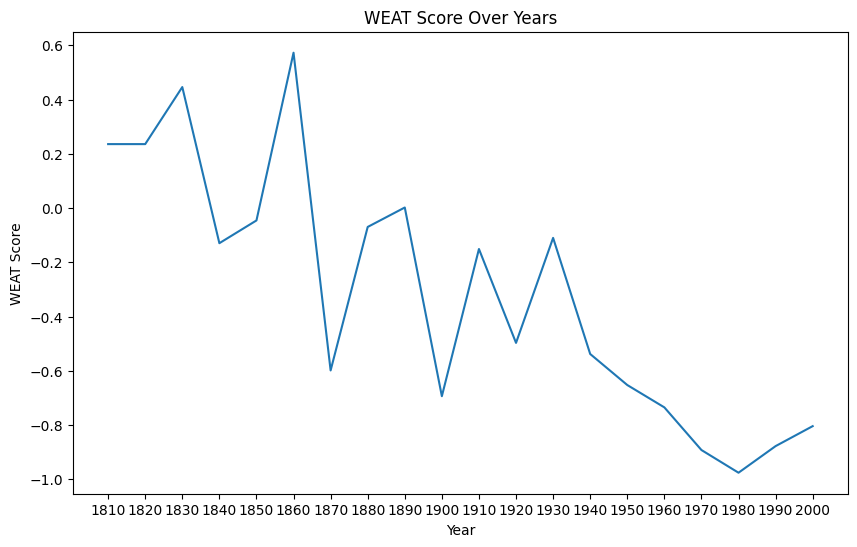

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(years, effect_size_result)
plt.xlabel('Year')
plt.ylabel('WEAT Score')
plt.title('WEAT Score Over Years')

In [171]:
word_dict = {"toxic_appear":intelligence_toxic, "male": male, "female":female}
base_labels = ["toxic_appear","female","male"]

In [176]:
def tsne_plot(model, word_dict, base_labels):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    color_map = {'toxic_appear': 'green', 'female': 'red', 'male': 'blue'}

    for i in base_labels:
        for j in word_dict[i]:
            tokens.append(model[j])
            labels.append(i)
    token_new = np.array(tokens)
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(token_new)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(5, 5))  # Adjust the figure size
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color=color_map[labels[i]], s=5)  # Set dot size to 5

    # Create dummy scatter plots for legend
    for label, color in color_map.items():
        plt.scatter([], [], color=color, label=label)

    # Add legend
    plt.legend()

    # Set consistent axis limits
    plt.xlim(-50, 50)
    plt.ylim(-50, 50)

    # Hide x and y ticks
    # plt.xticks([])
    # plt.yticks([])

    plt.show()


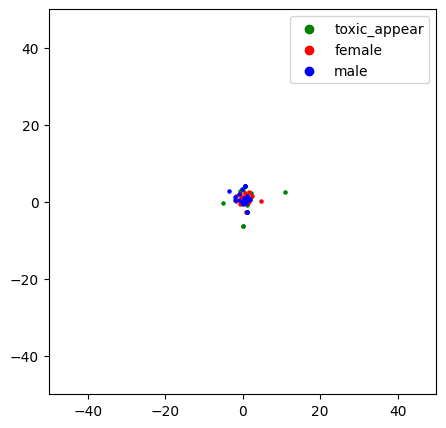

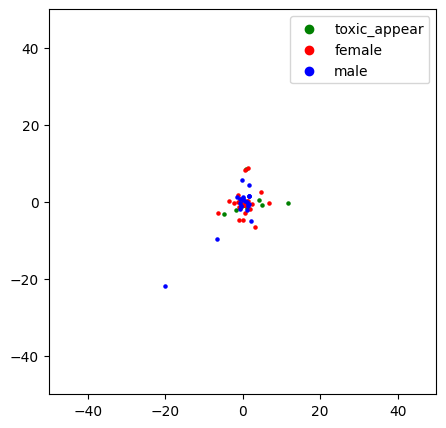

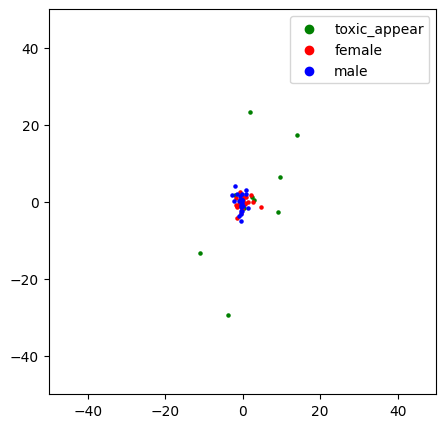

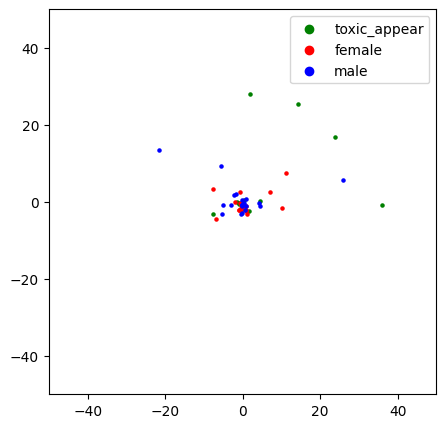

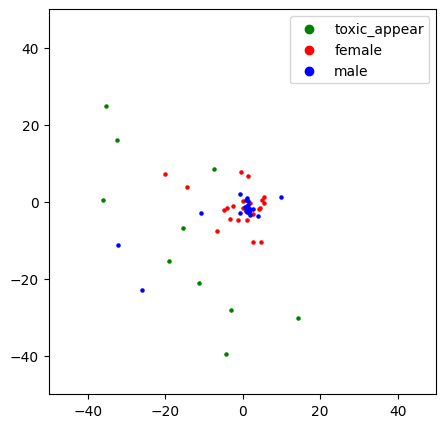

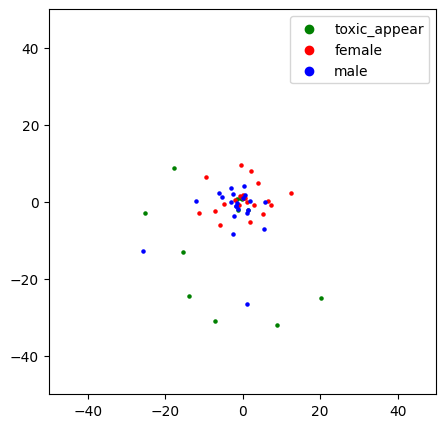

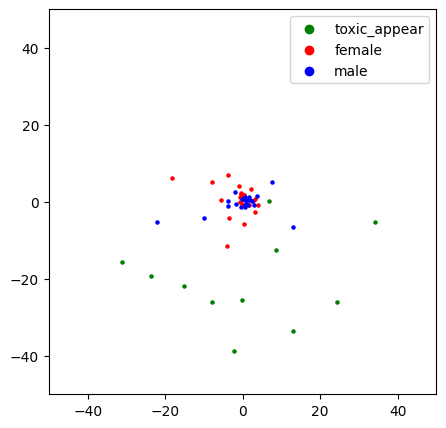

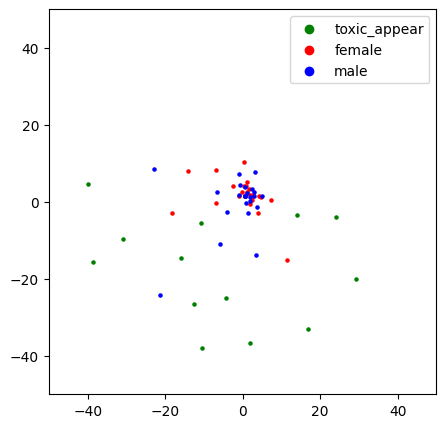

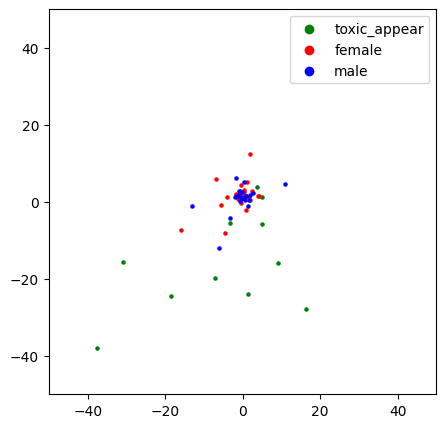

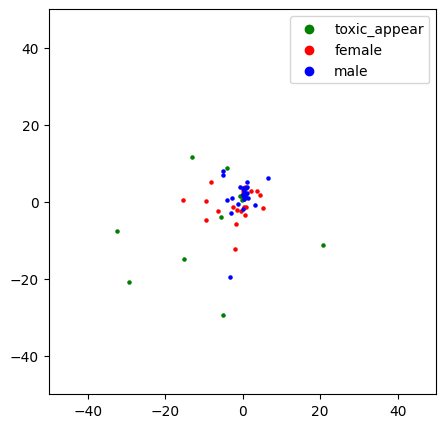

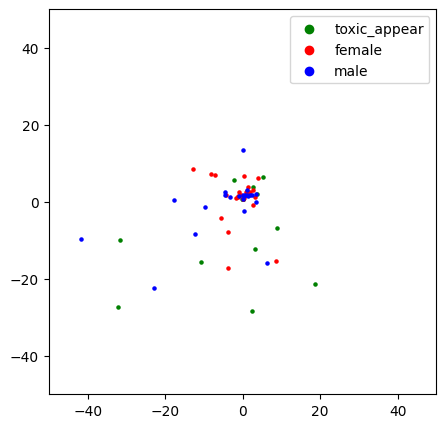

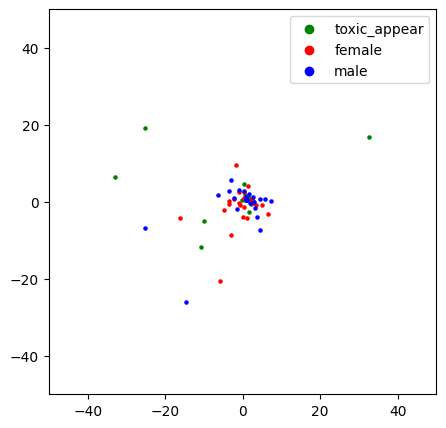

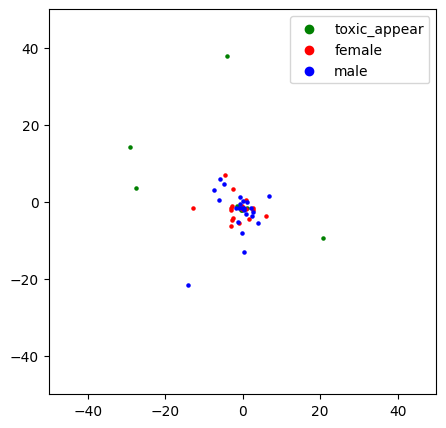

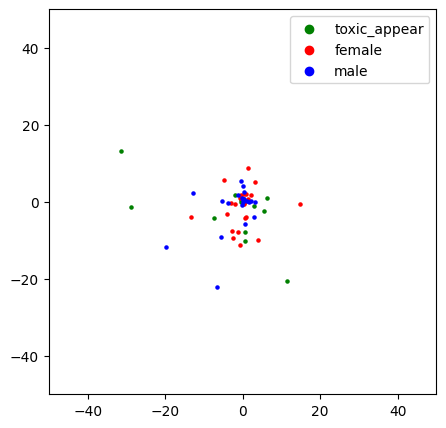

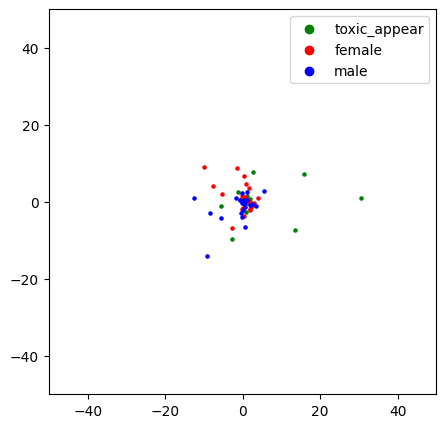

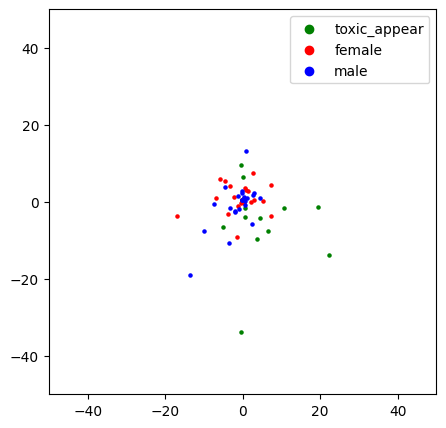

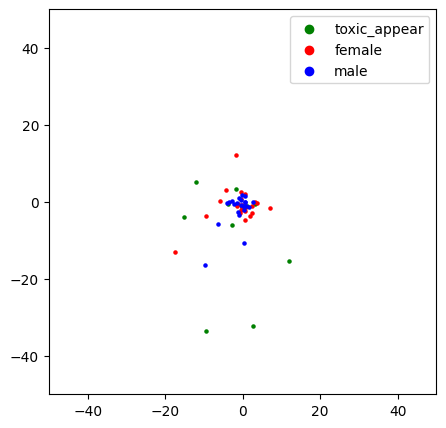

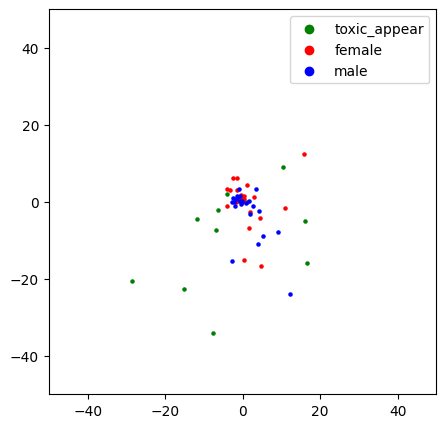

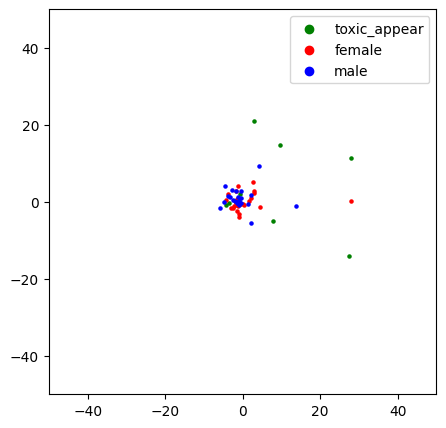

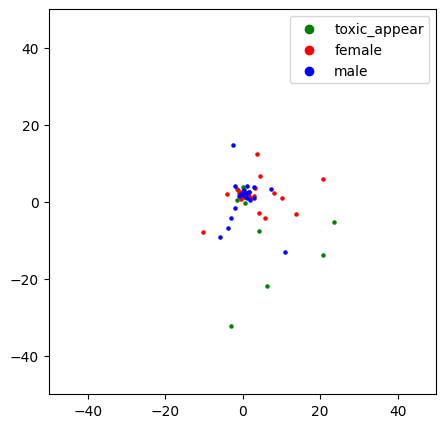

In [177]:
from sklearn.manifold import TSNE

for i in range(len(years)):

    words = np.load(file_path_words[i], allow_pickle=True)
    vecs = np.load(vec_path[i], allow_pickle=True)

    keyed_vectors = KeyedVectors(vector_size=len(vecs[0]))
    keyed_vectors.add_vectors(words, vecs)
    tsne_plot(keyed_vectors, word_dict, base_labels)